In [28]:
%matplotlib inline
%config InlineBackend.figure_formaT = 'retina'

from collections import OrderedDict

import numpy as np
import time
import torch
from torch import nn,optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

### Get the data and define the network

In [14]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5]),
                                ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

The output from softmax is a probability distribution. Often, the output will have values really close to zero or really close to one. Due to inaccuracies with representing numbers as floating points, computations with a softmax output can lose accuracy and become unstable. To get around this, we'll use the raw output, called the $\textbf{logits}$, to calculate the loss.

In [15]:
# Hyperparameters for our network
input_size = 784
hidden_size = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('logits', nn.Linear(hidden_size[1], output_size))
]))

### Training the network!

In [16]:
# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [17]:
# Try for one learning step before applying on all data.
print('Initial weights : ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient: ', model.fc1.weight.grad)
optimizer.step()

print('Updated weights: ', model.fc1.weight)

Initial weights :  Parameter containing:
tensor([[-0.0284, -0.0135, -0.0004,  ...,  0.0342,  0.0188,  0.0227],
        [ 0.0196, -0.0092, -0.0024,  ..., -0.0029,  0.0324, -0.0094],
        [-0.0028,  0.0209,  0.0064,  ..., -0.0167,  0.0315,  0.0193],
        ...,
        [ 0.0298, -0.0166,  0.0241,  ..., -0.0330, -0.0355, -0.0234],
        [ 0.0239,  0.0216,  0.0340,  ..., -0.0053,  0.0048, -0.0318],
        [-0.0332,  0.0289, -0.0229,  ...,  0.0335, -0.0112,  0.0198]],
       requires_grad=True)
Gradient:  tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-3.2538e-03, -3.2538e-03, -3.2538e-03,  ..., -3.2538e-03,
         -3.2538e-03, -3.2538e-03],
        [-1.1678e-03, -1.1678e-03, -1.1678e-03,  ..., -1.1678e-03,
         -1.1678e-03, -1.1678e-03],
        ...,
        [ 2.9312e-03,  2.9312e-03,  2.9312e-03,  ...,  2.9312e-03,
          2.9312e-03,  2.9312e-03],
        [ 4.2130e-04,  4.2130e-04,  4.2130e-04,  ...,  4.2130e

### Training for whole data

In [18]:
optimizer = optim.SGD(model.parameters(), lr = 0.003)

In [20]:
epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)

        optimizer.zero_grad()

        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps%print_every == 0:
            print('Epoch: {}/{}...'.format(e+1, epochs),
                  'Loss: {:.4f}'.format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3... Loss: 2.2898
Epoch: 1/3... Loss: 2.2714
Epoch: 1/3... Loss: 2.2489
Epoch: 1/3... Loss: 2.2350
Epoch: 1/3... Loss: 2.2108
Epoch: 1/3... Loss: 2.1894
Epoch: 1/3... Loss: 2.1667
Epoch: 1/3... Loss: 2.1271
Epoch: 1/3... Loss: 2.1020
Epoch: 1/3... Loss: 2.0712
Epoch: 1/3... Loss: 2.0205
Epoch: 1/3... Loss: 1.9731
Epoch: 1/3... Loss: 1.9326
Epoch: 1/3... Loss: 1.8758
Epoch: 1/3... Loss: 1.8215
Epoch: 1/3... Loss: 1.7581
Epoch: 1/3... Loss: 1.6905
Epoch: 1/3... Loss: 1.6481
Epoch: 1/3... Loss: 1.5768
Epoch: 1/3... Loss: 1.5114
Epoch: 1/3... Loss: 1.4506
Epoch: 1/3... Loss: 1.3935
Epoch: 1/3... Loss: 1.3335
Epoch: 2/3... Loss: 0.6991
Epoch: 2/3... Loss: 1.1962
Epoch: 2/3... Loss: 1.1639
Epoch: 2/3... Loss: 1.0897
Epoch: 2/3... Loss: 1.0828
Epoch: 2/3... Loss: 1.0370
Epoch: 2/3... Loss: 0.9952
Epoch: 2/3... Loss: 0.9420
Epoch: 2/3... Loss: 0.9036
Epoch: 2/3... Loss: 0.8864
Epoch: 2/3... Loss: 0.8595
Epoch: 2/3... Loss: 0.8237
Epoch: 2/3... Loss: 0.7965
Epoch: 2/3... Loss: 0.7626
E

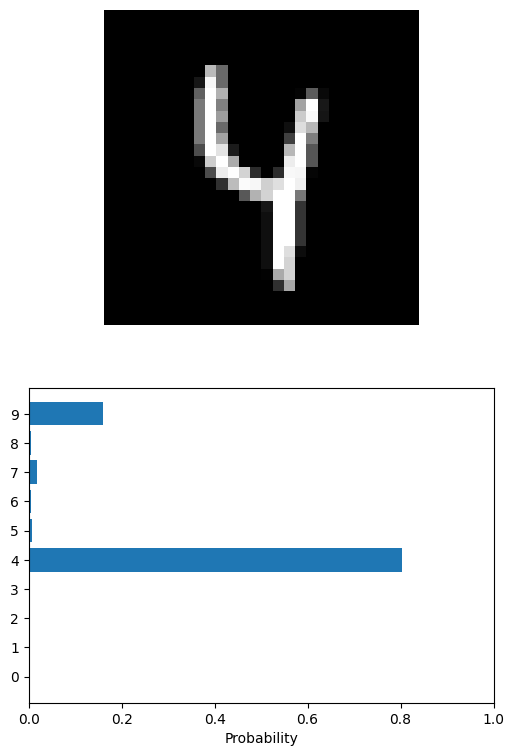

In [29]:
# To check out prediction using trained network
images, labels = next(iter(trainloader))

img = images[0].view(1,784)
# Turn off gradients to speed up the process
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
def view_classify(img, ps, classes=None):
    """Function to visualize an image and its predicted probabilities.
    
    Parameters:
    - img: PyTorch tensor of the image, reshaped to (1, 28, 28).
    - ps: Probability scores for each class.
    - classes: Optional list of class names.
    """
    # Convert the PyTorch tensor to a numpy array and squeeze to remove the batch dimension
    img = img.numpy().squeeze()
    
    # Convert the probabilities tensor to a numpy array
    ps = ps.detach().numpy().squeeze()

    # Create a figure with two subplots: one for the image and one for the probabilities
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), nrows=2)
    
    # Display the image on the first subplot
    ax1.imshow(img, cmap='gray')
    ax1.axis('off')  # Turn off axis
    
    # Display the probability distribution as a bar chart
    ax2.barh(np.arange(len(ps)), ps)
    if classes is not None:
        ax2.set_yticks(np.arange(len(classes)))
        ax2.set_yticklabels(classes)
    else:
        ax2.set_yticks(np.arange(len(ps)))
    ax2.set_xlabel('Probability')
    ax2.set_xlim(0, 1)

    plt.show()

view_classify(img.view(1, 28, 28), ps, classes=[str(i) for i in range(10)])